In [1]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

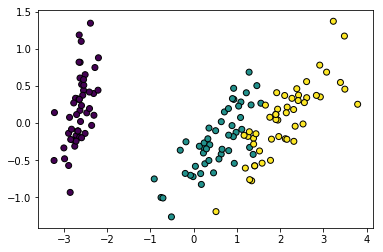

In [2]:
iris = datasets.load_iris()
Xorig = iris.data
y = iris.target
pca = PCA(n_components=2)
X = pca.fit(Xorig).transform(Xorig)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

## a) 
Let $$P(X \space | \space \mu,\Sigma) = \frac {1}{2 \pi |\Sigma|^{1/2}} * \exp[-\frac{1}{2}(X-\mu)^T \Sigma^{-1}(X-\mu)]$$ be the bivariate Gaussian Distribution case, <br>
where $x, \mu \in \mathbb{R}^2$ and $\Sigma \in \mathbb{R}^{2 \times 2}$

In [3]:
#Extraction of every class
c1,c2 = 1, 2
class1 = np.empty((0,2))
class2 = np.empty((0,2))
for i in range(len(X)):    
    if y[i] == c1:
        class1 = np.vstack((class1, X[i]))
    elif y[i] == c2:
        class2 = np.vstack((class2, X[i]))
print(class1.shape)
print(class2.shape)

(50, 2)
(50, 2)


### Mean for class 1:
$$\mu_1 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(1)}_{i}}$$ where $C^{(1)}$ refers to class 1 vector

In [4]:
mu_1 = np.mean(class1, axis=0, keepdims=True)
print(mu_1)

[[ 0.53199262 -0.24402963]]


### Mean for class 2:
$$\mu_2 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(2)}_{i}}$$ where $C^{(2)}$ refers to class 2 vector

In [5]:
mu_2 = np.mean(class2, axis=0, keepdims=True)
print(mu_2)

[[2.10884814 0.05350968]]


### Covariance Matrix:
$$\Sigma = \frac{1}{n}[\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T} + \sum_{j=1}^{n_2}{(C_j^{(2)}-\mu_2)(C_j^{(2)}-\mu_2)^T}]$$ where $n = n_1 + n_2$ and $n_1=n_2$, then $$\Sigma = \frac{1}{2} [\frac{1}{n_1}\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T}+\frac{1}{n_2}\sum_{j=1}^{n_2}{(C_j^{(2)}-\mu_2)(C_j^{(2)}-\mu_2)^T}] = \frac{1}{2}(\Sigma_1 + \Sigma_2)$$

In [6]:
cov_matrix = (1.0/2)*(np.cov(class1,rowvar=False)+np.cov(class2,rowvar=False))
print(cov_matrix)

[[0.42752983 0.23683837]
 [0.23683837 0.20839321]]


## b)

The discriminant function can be seen as
$g_i(x) = P(C_i|x) = P(x|C_i)P(C_i)$ $_{(i=1,2)}$, where $x \in \mathbb{R}^2$, then
$$P(x | C_i) = \log (\frac {1}{2 \pi |\Sigma|^{1/2}}) + \log (\exp[-\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i)]) = -\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i)$$ since $\log (\frac {1}{2 \pi |\Sigma|^{1/2}})$ is a constant because $\Sigma$ is equal for all classes. <br>
There are two classes with the same number of observations, so the prior $P(C_i)$ can also be dropped.

In [7]:
def g_1(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_1), np.linalg.inv(cov_matrix)), (x-mu_1).T)

def g_2(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_2), np.linalg.inv(cov_matrix)), (x-mu_2).T)

def chooseClass(X):
    return np.array([0 if g_1(x) >= g_2(x) else 1 for x in X])

## c)

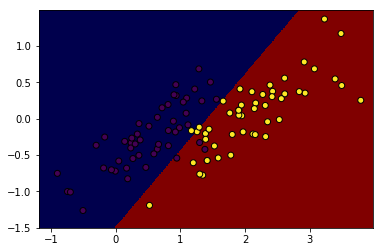

In [8]:
import warnings
import matplotlib
warnings.filterwarnings("ignore")

matplotlib.use('agg')
import pylab as pl

x_min = -1.2; x_max = 4.0
y_min = -1.5; y_max = 1.5

h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = chooseClass(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[50:, 0], X[50:, 1], marker='o', c=y[50:], edgecolor='k')

## d)

Let $g_i(x)$ be the discriminant function, which can be expressed as a linear function: <br>
$$g_i(x) = w_i^T x + w_{i0}$$
$$w_i = \Sigma^{-1} \mu_i$$
$$w_{i0} = - \frac {1}{2} \mu_i^T \Sigma^{-1} \mu_i$$

In [9]:
def g_1_linear(x):
    def w_1(mu_1, cov):
        return np.dot(np.linalg.inv(cov),mu_1.T)
    def w_10(mu_1, cov):
        return (-(1.0/2)*np.dot(mu_1,np.dot(np.linalg.inv(cov),mu_1.T)))
    return np.asscalar(np.dot(w_1(mu_1,cov_matrix).T,x.T) + w_10(mu_1,cov_matrix))

print(g_1(X[0]),g_1_linear(X[0]))

(array([[-47.93894969]]), -18.208300479027017)


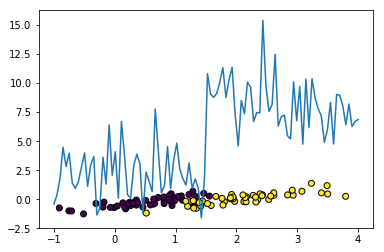

In [10]:
t = np.linspace(-1,4,100)
r = np.array([g_1_linear(x) for x in X[50:]])
plt.plot(t,r)
plt.scatter(X[50:, 0], X[50:, 1], marker='o', c=y[50:], edgecolor='k')

## e)

Since the discriminant function is expressad as
$g_i(x) = P(x|C_i)P(C_i)$ $_{(i=1,2)}$, and to discriminate we choose the class j that maximizes the discriminant
function, we can take the log which is <br>
$$g_i(x) = \log P(x|C_i)+\log P(C_i)$$
which can be seen as a constant factor multiplied by $x$ and the prior is also constant, then we can express 
$g_i(x) = ax + b$. Finally, if we change the prior what we get is to shift the line.


In [89]:
def g_1_withPrior(x, prior):
    return -(1.0/2)*np.dot(np.dot((x-mu_1), np.linalg.inv(cov_matrix)), (x-mu_1).T) + np.log(prior)

def g_2_withPrior(x, prior):
    return -(1.0/2)*np.dot(np.dot((x-mu_2), np.linalg.inv(cov_matrix)), (x-mu_2).T) + np.log(prior)

def chooseClassWithPrior(X, prior):
    return np.array([0 if g_1_withPrior(x, prior) >= g_2_withPrior(x, 1 - prior) else 1 for x in X])

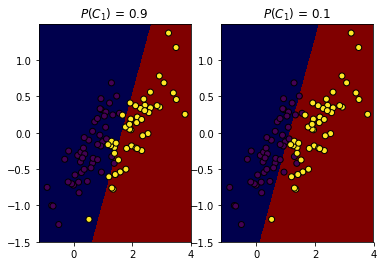

In [96]:
x_min = -1.2; x_max = 4.0
y_min = -1.5; y_max = 1.5

plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace=0.5)
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClassWithPrior(np.c_[xx.ravel(), yy.ravel()],0.9)
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[50:, 0], X[50:, 1], marker='o', c=y[50:], edgecolor='k')
plt.title(r'$P(C_1)$ = 0.9')

plt.subplot(1, 2, 2)
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClassWithPrior(np.c_[xx.ravel(), yy.ravel()],0.1)
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[50:, 0], X[50:, 1], marker='o', c=y[50:], edgecolor='k')
plt.title(r'$P(C_1)$ = 0.1')

## 2)

## a) 
Let $$P(X \space | \space \mu,\Sigma) = \frac {1}{2 \pi |\Sigma|^{1/2}} * \exp[-\frac{1}{2}(X-\mu)^T \Sigma^{-1}(X-\mu)]$$ be the bivariate Gaussian Distribution case, <br>
where $x, \mu \in \mathbb{R}^2$ and $\Sigma \in \mathbb{R}^{2 \times 2}$

In [11]:
#Extraction of every class
c1, c2 = 1, 2
class1, class2, class3 = np.empty((0,2)), np.empty((0,2)), np.empty((0,2))
for i in range(len(X)):    
    if y[i] == c1:
        class1 = np.vstack((class1, X[i]))
    elif y[i] == c2:
        class2 = np.vstack((class2, X[i]))
    else:
        class3 = np.vstack((class3, X[i]))
print(class1.shape)
print(class2.shape)
print(class3.shape)

(50, 2)
(50, 2)
(50, 2)


### Mean for class 1:
$$\mu_1 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(1)}_{i}}$$ where $C^{(1)}$ refers to class 1 vector

In [12]:
mu_1 = np.mean(class1, axis=0, keepdims=True)
print(mu_1)

[[ 0.53199262 -0.24402963]]


### Mean for class 2:
$$\mu_2 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(2)}_{i}}$$ where $C^{(2)}$ refers to class 2 vector

In [13]:
mu_2 = np.mean(class2, axis=0, keepdims=True)
print(mu_2)

[[2.10884814 0.05350968]]


### Mean for class 3:
$$\mu_2 = \frac{1}{n} * \sum_{i=1}^{n}{C^{(2)}_{i}}$$ where $C^{(2)}$ refers to class 2 vector

In [14]:
mu_3 = np.mean(class3, axis=0, keepdims=True)
print(mu_3)

[[-2.64084076  0.19051995]]


### Covariance Matrix:

$$\Sigma = \frac{1}{n}[\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T} + \sum_{j=1}^{n_2}{(C_j^{(2)}-\mu_2)(C_j^{(2)}-\mu_2)^T} + \sum_{h=1}^{n_3}{(C_h^{(3)}-\mu_3)(C_h^{(3)}-\mu_3)^T} ]$$ where $n = n_1 + n_2 + n_3 $ and $n_1 = n_2 = n_3 $, then 
$$\Sigma = \frac{1}{3} [\frac{1}{n_1}\sum_{i=1}^{n_1}{(C_i^{(1)}-\mu_1)(C_i^{(1)}-\mu_1)^T} + \frac{1}{n_2}\sum_{j=1}^{n_2}{(C_j^{(2)}-\mu_2)(C_j^{(2)}-\mu_2)^T} + \frac{1}{n_3}\sum_{h=1}^{n_3}{(C_h^{(3)}-\mu_3)(C_h^{(3)}-\mu_3)^T}] = \frac{1}{3}(\Sigma_1 + \Sigma_2 + \Sigma_3)$$

In [15]:
cov_matrix = (1.0/3)*(np.cov(class1,rowvar=False)+np.cov(class2,rowvar=False)+np.cov(class3,rowvar=False))
print(cov_matrix)

[[0.30126835 0.17690851]
 [0.17690851 0.21196403]]


The discriminant function can be seen as
$g_i(x) = P(C_i|x) = P(x|C_i)P(C_i)$ $_{(i=1,2,3)}$, where $x \in \mathbb{R}^2$, then
$$P(x | C_i) = \log (\frac {1}{2 \pi |\Sigma|^{1/2}}) + \log (\exp[-\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i)]) = -\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i)$$ since $\log (\frac {1}{2 \pi |\Sigma|^{1/2}})$ is a constant because $\Sigma$ is equal for all classes. <br>
There are two classes with the same number of observations, so the prior $P(C_i)$ can also be dropped.

In [16]:
def g_1_2(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_1), np.linalg.inv(cov_matrix)), (x-mu_1).T)

def g_2_2(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_2), np.linalg.inv(cov_matrix)), (x-mu_2).T)

def g_3_2(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_3), np.linalg.inv(cov_matrix)), (x-mu_3).T)

def compare(a, b, c):
    if a >= b and a >= c:
        return 0
    if b >= a and b >= c:
        return 1
    return 2

def chooseClass(X):
    return np.array([compare(g_1_2(x), g_2_2(x), g_3_2(x)) for x in X])

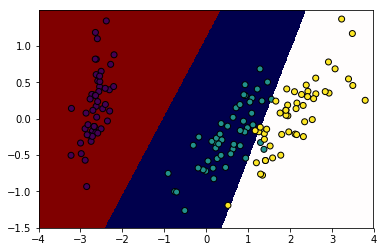

In [17]:
x_min = -4; x_max = 4.0
y_min = -1.5; y_max = 1.5

h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClass(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

## b)

In [18]:
cov_mat_class1 = np.cov(class1,rowvar=False)
cov_mat_class2 = np.cov(class2,rowvar=False)
cov_mat_class3 = np.cov(class3,rowvar=False)

print("Covariance Matrix class 1:")
print(cov_mat_class1)
print("\nCovariance Matrix class 2:")
print(cov_mat_class2)
print("\nCovariance Matrix class 3:")
print(cov_mat_class3)

Covariance Matrix class 1:
[[0.35611595 0.19839956]
 [0.19839956 0.18447935]]

Covariance Matrix class 2:
[[0.49894371 0.27527719]
 [0.27527719 0.23230706]]

Covariance Matrix class 3:
[[0.04874538 0.05704879]
 [0.05704879 0.21910567]]


## 3)

## a)

In [19]:
#Extraction of every class
factor = 1.25
class1_lim = X[:int(50/factor)]
class2_lim = X[50:50+int(50/factor)]
class3_lim = X[100:100+int(50/factor)]
print(class1_lim.shape, class2_lim.shape, class3_lim.shape)

((40, 2), (40, 2), (40, 2))


### Mean for class 1:

In [20]:
mu_1_lim = np.mean(class1_lim, axis=0, keepdims=True)
print(mu_1_lim)

[[-2.63667216  0.22837741]]


### Mean for class 2:

In [21]:
mu_2_lim = np.mean(class2_lim, axis=0, keepdims=True)
print(mu_2_lim)

[[ 0.61579271 -0.20004814]]


### Mean for class 3:

In [22]:
mu_3_lim = np.mean(class3_lim, axis=0, keepdims=True)
print(mu_3_lim)

[[2.15709612 0.05887868]]


### Covariance Matrix:

In [23]:
cov_matrix_lim = (1.0/3)*(np.cov(class1_lim,rowvar=False)+np.cov(class2_lim,rowvar=False)+np.cov(class3_lim,rowvar=False))
print(cov_matrix_lim)

[[0.32054569 0.18949865]
 [0.18949865 0.2271974 ]]


In [67]:
def g_1_3(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_1_lim), np.linalg.inv(cov_matrix_lim)), (x-mu_1_lim).T)

def g_2_3(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_2_lim), np.linalg.inv(cov_matrix_lim)), (x-mu_2_lim).T)

def g_3_3(x):
    return -(1.0/2)*np.dot(np.dot((x-mu_3_lim), np.linalg.inv(cov_matrix_lim)), (x-mu_3_lim).T)

def compare(a, b, c):
    if a >= b and a >= c:
        return 0
    if b >= a and b >= c:
        return 1
    return 2

def chooseClass(X):
    return np.array([compare(g_1_2(x), g_2_2(x), g_3_2(x)) for x in X])

## Plot

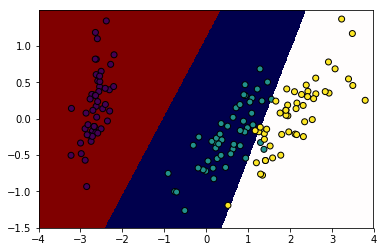

In [25]:
x_min = -4; x_max = 4.0
y_min = -1.5; y_max = 1.5

h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClass(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')

## b)

The Loss function is:



$$P(X \space | \space \mu,\Sigma) = \frac {1}{2 \pi |\Sigma|^{1/2}} * \exp[-\frac{1}{2}(X-\mu)^T \Sigma^{-1}(X-\mu)]$$

In [71]:
def g_1_3b(x):
    return (1.0/3)*(1.0/(2*np.pi*np.linalg.det(cov_matrix_lim)**(1.0/2)))*np.exp((-1.0/2)*np.dot(np.dot((x-mu_1_lim), np.linalg.inv(cov_matrix_lim)), (x-mu_1_lim).T))

def g_2_3b(x):
    return (1.0/3)*(1.0/(2*np.pi*np.linalg.det(cov_matrix_lim)**(1.0/2)))*np.exp((-1.0/2)*np.dot(np.dot((x-mu_2_lim), np.linalg.inv(cov_matrix_lim)), (x-mu_2_lim).T))

def g_3_3b(x):
    return (1.0/3)*(1.0/(2*np.pi*np.linalg.det(cov_matrix_lim)**(1.0/2)))*np.exp((-1.0/2)*np.dot(np.dot((x-mu_3_lim), np.linalg.inv(cov_matrix_lim)), (x-mu_3_lim).T))

def compare_rej(a, b, c, lambd):
    if a >= b and a >= c and a >= lambd:
        return 0
    if b >= a and b >= c and b >= lambd:
        return 1
    if c >= a and c >= b and c >= lambd:
        return 2
    return 3

In [72]:
"""
    Function that chooses i if g_i(x) if g_i(x) > g_k(x) for all k != i and g_i(x) > lambda
    otherwise chooses K + 1 
    where K is the number of classes
"""

def chooseClass_lim(X, lambd):
    return np.array([compare_rej(g_1_3b(x), g_2_3b(x), g_3_3b(x), lambd) for x in X])

In [73]:
print(chooseClass_lim(X,0.1))

[0 0 0 0 0 0 0 0 3 0 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0
 0 3 0 0 3 0 0 0 0 0 0 0 0 3 1 3 1 1 1 1 3 1 1 3 1 1 1 3 3 1 1 3 1 1 1 3 1
 1 1 1 3 1 3 1 3 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 2 3 2 2 2 3 3 3 2 3 3
 2 2 3 2 2 2 3 3 3 2 3 3 3 2 2 3 3 2 2 2 3 2 2 2 3 2 2 1 2 2 3 3 2 2 2 2 2
 2 2]


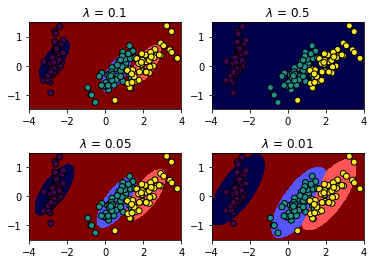

In [74]:
x_min = -4; x_max = 4.0
y_min = -1.5; y_max = 1.5

plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace=0.5)
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClass_lim(np.c_[xx.ravel(), yy.ravel()],0.1)
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.title(r'$\lambda$ = 0.1')

plt.subplot(2, 2, 2)
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClass_lim(np.c_[xx.ravel(), yy.ravel()],0.5)
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.title(r'$\lambda$ = 0.5')

plt.subplot(2, 2, 3)
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClass_lim(np.c_[xx.ravel(), yy.ravel()],0.05)
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.title(r'$\lambda$ = 0.05')

plt.subplot(2, 2, 4)
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z2 = chooseClass_lim(np.c_[xx.ravel(), yy.ravel()],0.01)
Z2 = Z2.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z2, cmap=pl.cm.seismic)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, edgecolor='k')
plt.title(r'$\lambda$ = 0.01')

As we can see $\lambda =0.05$ could be a reasonable value

## c)

In [85]:
factor = 1.25
x1_test = X[int(50/factor):50]
x2_test = X[50+int(50/factor):100]
x3_test = X[100+int(50/factor):150]
X_test = np.concatenate((x1_test, x2_test, x3_test))

y1_test = y[int(50/factor):50]
y2_test = y[50+int(50/factor):100]
y3_test = y[100+int(50/factor):150]
Y_test = np.concatenate((y1_test, y2_test, y3_test))

"""In this case, we will use the discriminator built in the previous point.
    The parameter lambda will be 0
    """
pred = chooseClass_lim(X_test,lambd=0)

print(X_test.shape)
print(Y_test)
print(pred)

(30, 2)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


## Confusion Matrix

Confusion matrix
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


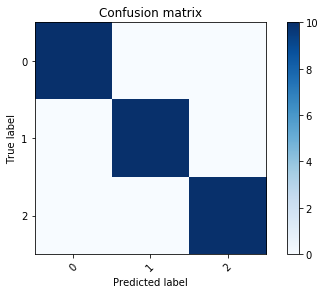

In [84]:
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2],
                      title='Confusion matrix')